In [6]:
from Bio.PDB.PDBParser import PDBParser
from collections import defaultdict
parser = PDBParser()
structure = parser.get_structure("test", "hxt1/swiss_model_01_hxt1.pdb")

atom_counts = defaultdict(int)

atoms = structure.get_atoms()
for atom in atoms:
    atomName = str(atom).split(' ')[1]
    atom_counts[atomName] += 1
    


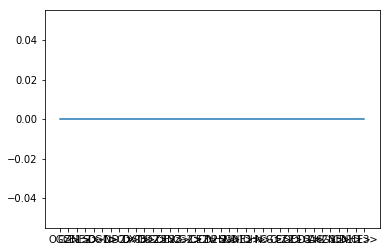

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
model = structure[0]
chain = model["A"]
residue1=chain[(" ", 100, " ")]
residue2=chain[(" ", 101, " ")]

atom1 = residue1["CA"]
atom2 = residue2["CA"]

distance = atom1 - atom2
print(distance)

3.7874131


In [8]:
print(atom_counts)

defaultdict(<type 'int'>, {0: 0, 1: 0, 2: 0, 'OG>': 32, 'CZ>': 82, 'CE1>': 68, 6: 0, 'NE2>': 17, 8: 0, 9: 0, 'SD>': 21, 'OG1>': 25, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 'O>': 468, 'ND2>': 14, 3: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 4: 0, 'CD>': 75, 'OXT>': 1, 'CB>': 419, 26: 0, 30: 0, 5: 0, 32: 0, 'OD2>': 11, 34: 0, 27: 0, 'CZ3>': 10, 28: 0, 'OE2>': 17, 'NZ>': 12, 29: 0, 'CG2>': 110, 'C>': 468, 'CE2>': 74, 31: 0, 10: 0, 36: 0, 11: 0, 'CD2>': 107, 'NH2>': 18, 'SG>': 18, 'ND1>': 4, 'NE1>': 10, 'OH>': 25, 35: 0, 'N>': 468, 'CG>': 228, 7: 0, 'CE>': 33, 'CZ2>': 10, 'OE1>': 30, 'OD1>': 25, 'CA>': 468, 17: 0, 'CH2>': 10, 'CG1>': 85, 18: 0, 'NE>': 18, 19: 0, 25: 0, 'CD1>': 144, 33: 0, 'NH1>': 18, 'CE3>': 10})


In [41]:
from Bio.SVDSuperimposer import SVDSuperimposer
from numpy import array, dot, set_printoptions

structure1 = parser.get_structure("test", "hxt1/swiss_model_01_hxt1.pdb")
structure2 = parser.get_structure("test", "hxt1/swiss_model_02_hxt1.pdb")

x, y = [], []
model1 = structure1[0]
for chain1 in model1:
    for residue1 in chain1:
        for atom1 in residue1:
            x.append(atom1.get_coord())

model2 = structure2[0]
for chain2 in model2:
    for residue2 in chain2:
        for atom2 in residue2:
            y.append(atom1.get_coord())   
            
x = array(x[:3202])
y = array(y[:3202])

print(len(x))
print(len(y))

# x = array([[51.65, -1.90, 50.07],
#      [50.40, -1.23, 50.65],
#      [50.68, -0.04, 51.54],
#      [50.22, -0.02, 52.85]], 'f')

# y = array([[51.30, -2.99, 46.54],
#      [51.09, -1.88, 47.58],
#      [52.36, -1.20, 48.03],
#      [52.71, -1.18, 49.38]], 'f')

sup = SVDSuperimposer()

sup.set(x, y)

sup.run()

rms = sup.get_rms()

print(rms)

3202
3202
22.588753853022023
